[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/Tabular-Cross-Sectional-Modelling/blob/main/modelling/classification/BayesAlgorithm.ipynb)

In [75]:
# Mathematics behind this can be found here on my medium article : (Recommended Read)
# https://khetansarvesh.medium.com/bayes-algorithm-for-binary-classification-explained-with-equations-df6ccd977631

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# **Dataset**

In [77]:
def create_dataset(prob_class1, mean_class1, sigma_class1,
                   prob_class2, mean_class2, sigma_class2,
                   total_data_points = 10000):

  # creating class0 datapoint
  no_of_class1_datapoints = int(np.round(prob_class1*total_data_points))
  feature1_class1 = np.random.normal(mean_class1[0], np.sqrt(sigma_class1[0,0]), no_of_class1_datapoints)
  feature2_class1 = np.random.normal(mean_class1[1], np.sqrt(sigma_class1[1,1]), no_of_class1_datapoints)
  y_class1 = np.ones(no_of_class1_datapoints)
  dataset_class1 = [feature1_class1, feature2_class1, y_class1]

  # creating class1 datapoints
  no_of_class2_datapoints = int(np.round(prob_class2*total_data_points))
  feature1_class2 = np.random.normal(mean_class2[0], np.sqrt(sigma_class2[0,0]), no_of_class2_datapoints)
  feature2_class2 = np.random.normal(mean_class2[1], np.sqrt(sigma_class2[1,1]), no_of_class2_datapoints)
  y_class2 = np.ones(no_of_class2_datapoints) + np.ones(no_of_class2_datapoints)
  dataset_class2 = [feature1_class2, feature2_class2, y_class2]

  return dataset_class1, dataset_class2

# **Training**

In [78]:
# There is no training in this algorithm

# **Inference**

In [79]:
def cal_class_prob_value(prob,  # scalar
                                 mean,  # vector
                                 sigma, # matrix
                                 X):

  feature1 = X[0]
  feature2 = X[1]

  term1 = np.log(prob)
  term2 = 0.5 * np.log(np.linalg.det(sigma))
  term3 = np.square(feature1 - mean[0])/(2*sigma[0,0]) + np.square(feature2 - mean[1])/(2*sigma[1,1])
  return term1 - term2 - term3

In [84]:
def bayes(X,
          prob_class1, mean_class1, sigma_class1,
          prob_class2, mean_class2, sigma_class2) :

  # calculating the discriminant value
  class_1_p = cal_class_prob_value(prob_class1, mean_class1 ,sigma_class1, X)
  class_2_p = cal_class_prob_value(prob_class2, mean_class2 ,sigma_class2, X)

  # making comparision, whichever is greater assigning them that class
  h = np.zeros(X[0].shape)
  h[class_1_p > class_2_p] = 1
  h[class_1_p <= class_2_p] = 2

  return h

In [85]:
def inference(dataset_class1, prob_class1, mean_class1, sigma_class1,
              dataset_class2, prob_class2, mean_class2, sigma_class2):


  # performing predictions for class 1
  predictions_class1 = bayes(dataset_class1, prob_class1, mean_class1, sigma_class1, prob_class2, mean_class2, sigma_class2)
  print(f'Predictions for features which were actually Class 1 : {predictions_class1}')
  count = 0
  for k in predictions_class1:
    if k == 2:
      count = count + 1
  print(f'No. of Misclassification to class 2 : {count}')


  # performing predictions for class 2
  predictions_class2 = bayes(dataset_class2, prob_class1, mean_class1, sigma_class1, prob_class2, mean_class2, sigma_class2)
  print(f'Predictions for features which were actually Class 2 : {predictions_class2}')
  count = 0
  for k in predictions_class2:
    if k == 1:
      count = count + 1
  print(f'No. of Misclassification to class 2 : {count}')


  # Getting Region
  feature1, feature2 = np.meshgrid(np.arange(-50, 50, .1),np.arange(-50, 50, .1))
  h = bayes([feature1, feature2], prob_class1, mean_class1, sigma_class1, prob_class2, mean_class2, sigma_class2) #1000*1000
  print(h.shape)
  plt.contourf(feature1[0,:],feature2[:,0],h[:, :])

  LL = [i for i in range(3)]
  cs = plt.contourf(feature1[0,:], feature2[:,0],h[:,:], LL)

  proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in cs.collections]
  legend_labels = [f"{i + 1}: $\omega_{i}$ selected" for i in range(2)] # this line jus generate an array that can be used in creating the legend
  plt.legend(proxy, legend_labels)
  plt.xlabel('feature x')
  plt.ylabel('feature y')
  plt.grid()

  plt.scatter(
    dataset_class1[0],
    dataset_class1[1],
    s=20,
    linewidth=1,
    facecolors='r',
    edgecolors="none",
    label='for hypothesis Class1'
    )

  plt.scatter(
    dataset_class2[0],
    dataset_class2[1],
    s=20,
    linewidth=1,
    facecolors='k',
    edgecolors="none",
    label='for hypothesis Class2'
    )

  plt.legend()


  ax = plt.gca()                 # This blotch of code forces the graph's aspect ratio to be square
  ax.set_aspect('equal', adjustable='box')
  plt.draw()
  return

## **Case 1 : Same Covariance Matrix**

In [86]:
# class0
prob_class1 = 0.5
mean_class1 = np.array([-10,10]) #mean vector
sigma_class1 = np.diag((60, 60)) #covariance matrix

# class1
prob_class2 = 0.5
mean_class2 = np.array([10,-10]) #mean vector
sigma_class2 = np.diag((60, 60)) #covariance matrix

Predictions for features which were actually Class 1 : [1. 1. 1. ... 1. 1. 1.]
No. of Misclassification to class 2 : 183
Predictions for features which were actually Class 2 : [2. 2. 2. ... 2. 2. 2.]
No. of Misclassification to class 2 : 156
(1000, 1000)


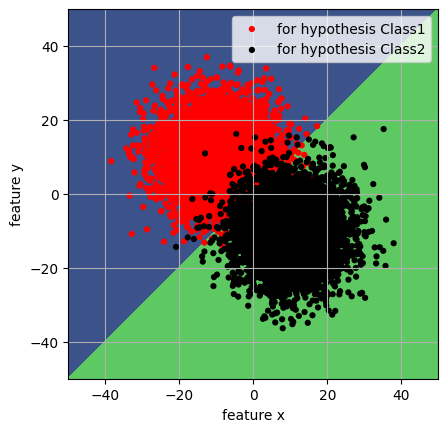

In [87]:
dataset_class1, dataset_class2 = create_dataset(prob_class1, mean_class1, sigma_class1, prob_class2, mean_class2, sigma_class2)
inference(dataset_class1, prob_class1, mean_class1, sigma_class1, dataset_class2, prob_class2, mean_class2, sigma_class2)

## **Case 2 : Different Covariance Matrix**


In [88]:
# class0
prob_class1 = 0.85
mean_class1 = np.array([-15,15]) #mean vector
sigma_class1 = np.diag((36, 36)) #covariance matrix

# class1
prob_class2 = 0.15
mean_class2 = np.array([0,0]) #mean vector
sigma_class2 = np.diag((49, 49)) #covariance matrix

Predictions for features which were actually Class 1 : [1. 1. 1. ... 1. 1. 1.]
No. of Misclassification to class 2 : 111
Predictions for features which were actually Class 2 : [2. 2. 2. ... 2. 2. 2.]
No. of Misclassification to class 2 : 173
(1000, 1000)


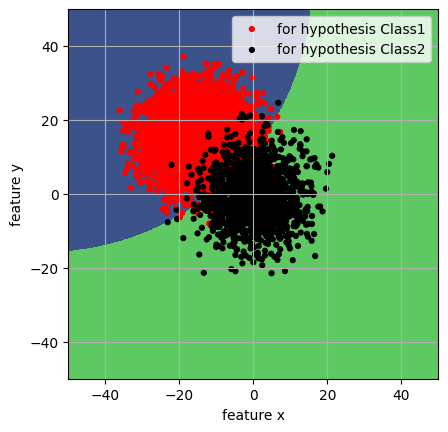

In [89]:
dataset_class1, dataset_class2 = create_dataset(prob_class1, mean_class1, sigma_class1, prob_class2, mean_class2, sigma_class2)
inference(dataset_class1, prob_class1, mean_class1, sigma_class1, dataset_class2, prob_class2, mean_class2, sigma_class2)